In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('kaggle_survey_2021_responses.csv')
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_11952\2806977528.py:1: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('kaggle_survey_2021_responses.csv')


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [3]:
data.shape

(25974, 369)

# clean the data

In [4]:
the_q=data.iloc[0,:]
the_q

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [5]:
data=data.drop(0) 

In [6]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [8]:
for col in data.columns:                               #from object to numeric
    if data[col].str.isnumeric().all():
        data[col]=pd.to_numeric(data[col])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: float64(8), int64(1), object(360)
memory usage: 73.1+ MB


In [10]:
data['Q3'].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China',
       'Iran, Islamic Republic of...', 'United States of America',
       'Italy', 'Viet Nam', 'Israel', 'Peru', 'South Africa', 'Other',
       'Spain', 'Bangladesh',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Switzerland', 'Algeria', 'Tunisia', 'Argentina', 'Sweden',
       'Colombia', 'I do not wish to disclose my location', 'Canada',
       'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia', 'Romania',
       'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus', 'Ireland',
       'Portugal', 'Hong Kong (S.A.R.)', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 'Norway', 'Czech Republic'],
      dtype=obje

In [11]:
countries_str= 'Algeria, Bahrain, the Comoros Islands, Djibouti, Egypt, Iraq, Jordan, Kuwait, Lebanon, Libya, Morocco, Mauritania, Oman, Palestine, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, United Arab Emirates, Yemen'
arab_countries=countries_str.split(', ')
arab_countries

['Algeria',
 'Bahrain',
 'the Comoros Islands',
 'Djibouti',
 'Egypt',
 'Iraq',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Morocco',
 'Mauritania',
 'Oman',
 'Palestine',
 'Qatar',
 'Saudi Arabia',
 'Somalia',
 'Sudan',
 'Syria',
 'Tunisia',
 'United Arab Emirates',
 'Yemen']

In [12]:
data['Q3'].isin(arab_countries)

1        False
2        False
3        False
4        False
5        False
         ...  
25969     True
25970    False
25971    False
25972    False
25973    False
Name: Q3, Length: 25973, dtype: bool

In [13]:
data_arabs=data.loc[data['Q3'].isin(arab_countries)]
data_arabs

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
20,650,30-34,Man,Egypt,Bachelor’s degree,Other,< 1 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
34,744,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
37,244,25-29,Woman,Egypt,Master’s degree,Currently not employed,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,453,18-21,Woman,Egypt,Bachelor’s degree,Student,1-3 years,Python,R,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,MLflow,NaN,NaN
85,161,25-29,Man,Algeria,Professional doctorate,Student,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,839,18-21,Man,United Arab Emirates,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25807,733,22-24,Woman,Egypt,Master’s degree,Software Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25831,744,18-21,Woman,Egypt,Bachelor’s degree,Student,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,534,22-24,Man,Egypt,Some college/university study without earning ...,Student,3-5 years,Python,NaN,NaN,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,NaN,NaN


In [14]:
data_arabs['Q3'].unique()

array(['Egypt', 'Algeria', 'Tunisia', 'Saudi Arabia', 'Morocco',
       'United Arab Emirates', 'Iraq'], dtype=object)

# Line plot for age distribution

In [15]:
the_q  # Q1 for age    #

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [16]:
age_groups=data_arabs['Q1'].value_counts().sort_index()
age_groups

18-21    179
22-24    250
25-29    190
30-34    130
35-39    109
40-44     74
45-49     45
50-54     23
55-59      8
60-69     10
Name: Q1, dtype: int64

In [17]:
x_axis=age_groups.index
x_axis

Index(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69'],
      dtype='object')

In [18]:
y_axis=age_groups.values
y_axis

array([179, 250, 190, 130, 109,  74,  45,  23,   8,  10], dtype=int64)

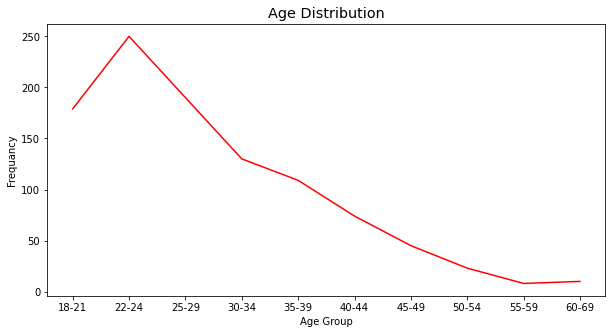

In [19]:
plt.figure(figsize=(10,5))

plt.plot(x_axis,y_axis,color='r')

plt.style.use("ggplot")
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequancy')

plt.show()

In [20]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Kaggle Users By Arab Country Distirbution

In [21]:
#x the country 
x=data_arabs['Q3'].unique()
x
#or x=bin.index   in below

array(['Egypt', 'Algeria', 'Tunisia', 'Saudi Arabia', 'Morocco',
       'United Arab Emirates', 'Iraq'], dtype=object)

In [22]:
#y the 
bine=data_arabs['Q3'].value_counts()
y=bine.values

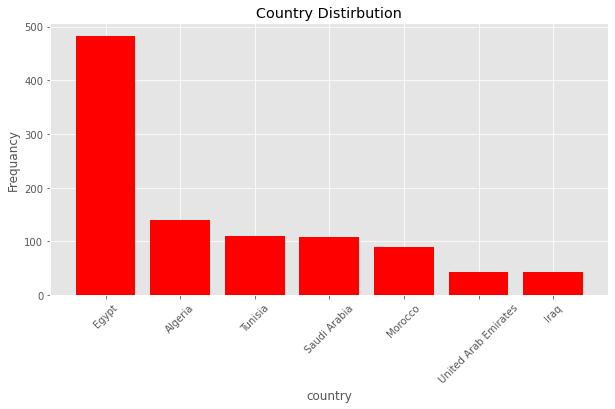

In [23]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.bar(x,y,color='r')


plt.title('Country Distirbution')
plt.xlabel('country')
plt.ylabel('Frequancy')
plt.xticks(rotation=45)
plt.show()

# Arab Kaggle Users By Programming Language Distirbution

In [24]:
q7_col=data.columns[data.columns.str.contains('Q7')]
q7_col

Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'],
      dtype='object')

In [25]:
data_arabs[q7_col]

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
34,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,Python,NaN,NaN,C,C++,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25807,Python,R,SQL,C,C++,Java,Javascript,NaN,NaN,Bash,MATLAB,NaN,NaN
25831,Python,NaN,SQL,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data['Q7_Part_1'].value_counts()

Python    21860
Name: Q7_Part_1, dtype: int64

In [27]:
data['Q7_Part_1'].value_counts().index

Index(['Python'], dtype='object')

In [28]:
data['Q7_Part_1'].value_counts().index[0]

'Python'

In [29]:
data['Q7_Part_1'].value_counts().values[0]

21860

In [30]:
dic_7=dict()
for col in q7_col:
    key=data_arabs[col].value_counts().index[0]
    dic_7[key]=data_arabs[col].value_counts().values[0]

In [31]:
dic_7

{'Python': 838,
 'R': 151,
 'SQL': 449,
 'C': 241,
 'C++': 293,
 'Java': 277,
 'Javascript': 212,
 'Julia': 5,
 'Swift': 14,
 'Bash': 54,
 'MATLAB': 183,
 'None': 9,
 'Other': 98}

In [32]:
q7_series = pd.Series(dic_7)
q7_series

Python        838
R             151
SQL           449
C             241
C++           293
Java          277
Javascript    212
Julia           5
Swift          14
Bash           54
MATLAB        183
None            9
Other          98
dtype: int64

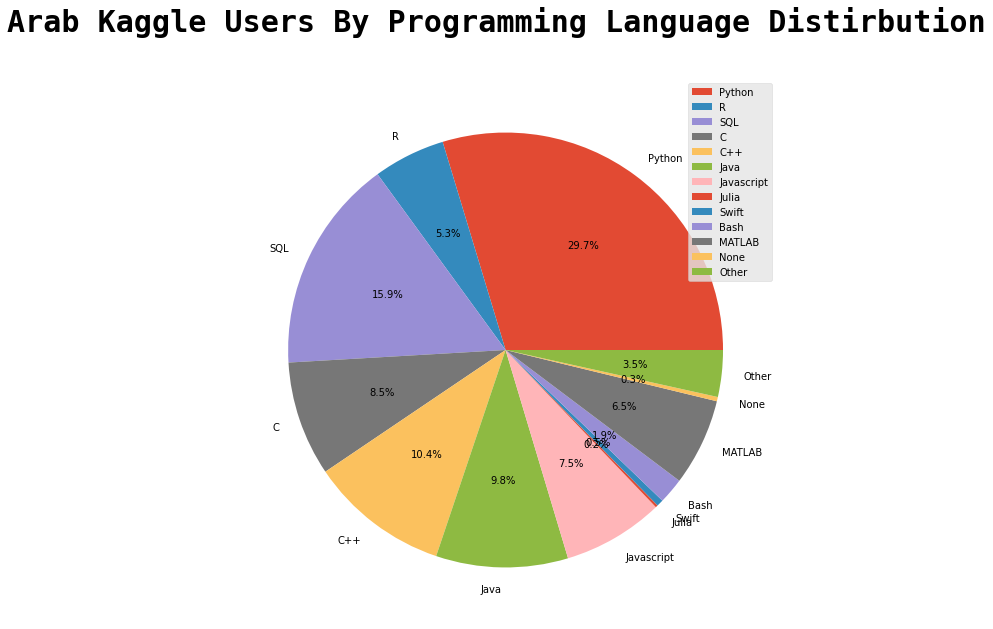

In [33]:
plt.figure(figsize=(10,10))
plt.pie(q7_series, labels=q7_series.index, autopct="%1.1f%%")
plt.legend(q7_series.index)
plt.suptitle('Arab Kaggle Users By Programming Language Distirbution', fontname = 'monospace', weight='bold', size=30)

plt.savefig("project(1).png")

plt.show()

In [72]:
q7_series = q7_series.sort_values(ascending=False)

In [73]:
cust_color = [
    '#6ee1fa',
'#65d4ee',
'#5cc6e3',
'#54b9d7',
'#4caccb',
'#449fbf',
'#3c93b3',
'#3586a7',
'#2d7a9b',
'#266e8f',
'#1f6282',
'#175776',
'#104c6b',
'#07415f',
'#003653'
]

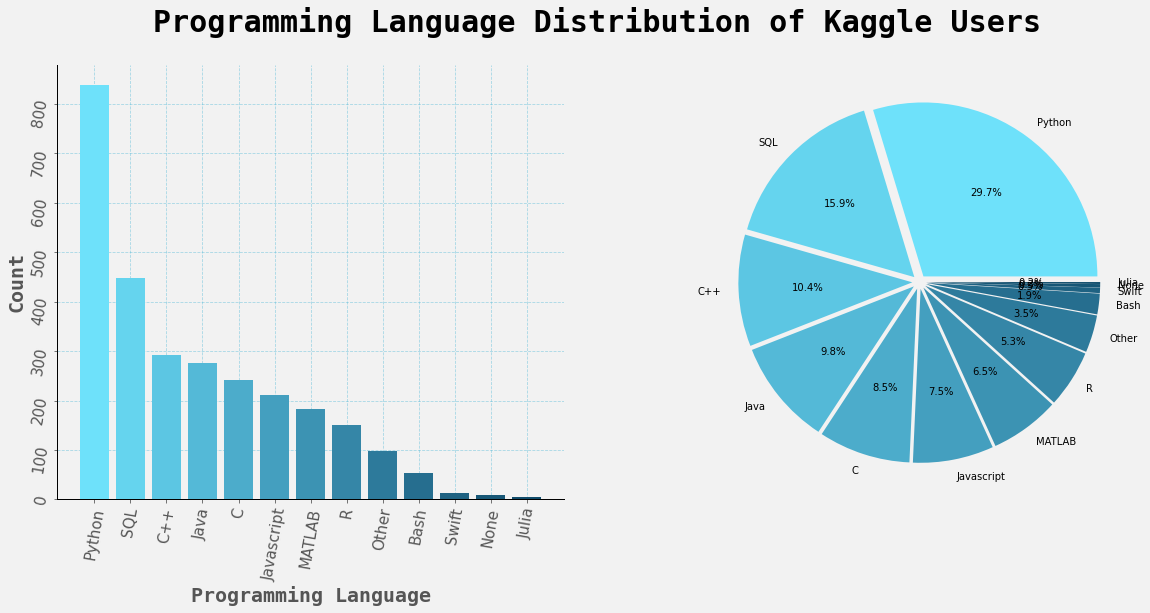

In [77]:
ffig, axes = plt.subplots(1, 2, figsize=(20,8))
ffig.patch.set_facecolor('#F2F2F2')

axes[0].bar(q7_series.index, q7_series.values, color=cust_color)
axes[0].set_ylabel('Count', weight='semibold', fontname = 'monospace', size=20)
axes[0].set_xlabel('Programming Language', weight='semibold', fontname = 'monospace', size=20)
axes[0].tick_params(labelrotation=80, labelsize=15)
axes[0].patch.set_facecolor('#F2F2F2')
axes[0].grid(color=cust_color[3], alpha=0.5, linestyle='--')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['left'].set_color('black')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)



## axes[1]
axes[1].pie(q7_series, labels=q7_series.index, autopct="%1.1f%%", colors=cust_color, explode=[.04 for i in range(len(q7_series))])

plt.suptitle('Programming Language Distribution of Kaggle Users', fontname = 'monospace', weight='bold', size=30)

ffig.savefig("project.png")

plt.show()